# 📁 01_data_preparation.ipynb
## Objetivo
Preparar el dataset de gatos y perros y generar carpetas separadas para entrenamiento, validación y test.


# Algoritmo de clasificación de imágenes

In [2]:
# Por tema credenciales, es mas facil hacer la descarga desde microsoft:
# https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip


# 1. El data set es muy grande (mas de 700 MG)
# 2. Dentro de las imagenes hay errores, y esas imagenes no las vamos a poder procesar.
# 3. Estructura de carpetas: El dataset original tiene 2 carpetas, una para cat y otra para dog.
#    Debemos convertir el dataset a los clasicos dataset de aprendisaje, validacion y prueba.

# Entonces:

    # * Bajar el dataset a colab
    # * Descomprimirlo
    # * Crear carpetas para el dataset de entrenamiento, validacion y prueba
    # * Dentro de cada carpeta, crear una carpeta cat y otra dog
    # * Debemos extraer las imagenes de manera aleatoria
    # * Montarlas en las carpetas corerspondientes
    # * Generar que cada carpeta contenga la etiqueta (el resultado de la clasificacion: cat | dog) 
    #   y las imagenes

# Todo esto lo haremos utilizando dos herramientas: Python y Bash

![alt text](Estrategia.png)

**⚠️ Aclaración Importante:**  
El dataset original (cats_and_dogs.zip) y las imágenes descomprimidas no están incluidos en el repositorio, debido a las restricciones de tamaño de GitHub.  
* Fue descargado desde la siguiente URL:  
'https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip'

* Se descomprimio y ubicarlo en la siguiente ruta:  
./data

Si esta limitacion no se diera, el codigo para extraer las imagenes podria ser el siguiente:  

<small><small> 

* Paso 1: Definir ruta local para descargar y extraer los datos
    ```
    DATA_DIR = "./data"
    os.makedirs(DATA_DIR, exist_ok=True)
    ```
* Paso 2: Definir la URL del dataset
    ```
    URL = 'https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip'
    ```

* Paso 3: Descargar y extraer el archivo zip
    ```
    path_to_zip = tf.keras.utils.get_file(
        fname='cats_and_dogs.zip',
        origin=URL,
        extract=True,
        cache_dir=DATA_DIR
    )

    print(f'Dataset descargado en: {path_to_zip}')
    ```

<small>

# ✔️ Imports

In [21]:
# 🔹 Librerías estándar
import os                                    # Manejo de archivos, rutas, y operaciones del sistema operativo

# 🔹 Librerías de terceros
import numpy as np                           # Cálculo numérico y manejo de arrays
import matplotlib.pyplot as plt              # Visualización de datos (gráficos estáticos)
from PIL import Image                        # Carga y manipulación de imágenes (formato PIL)
import plotly.graph_objects as go            # Visualizaciones interactivas con Plotly

import tensorflow as tf                      # Framework de Deep Learning (todo TensorFlow)
from tensorflow import keras                 # API de alto nivel para crear modelos dentro de TensorFlow
from tensorflow.keras.preprocessing import image        # Herramientas para cargar y preprocesar imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generador de datos para imágenes

# 🔹 Librerías de aprendizaje automático
from sklearn.metrics import (                # Métricas de evaluación para modelos de clasificación
    accuracy_score,                          # Métrica de precisión global
    classification_report,                   # Reporte con precisión, recall y F1 por clase
    ConfusionMatrixDisplay                   # Visualización de la matriz de confusión
)

# 🔹 Función utilitaria para manejo de archivos
def remove_file(path):
    if os.path.exists(path):
        try:
            os.remove(path)
        except PermissionError:
            print(f'Permission denied to delete {path}')
        except OSError:
            print(f'OS Error in {path}')


In [22]:
!ls ./data/datasets/cats_and_dogs/Cat

0.jpg	   11604.jpg  1963.jpg	3570.jpg  5178.jpg  6786.jpg  8393.jpg
1.jpg	   11605.jpg  1964.jpg	3571.jpg  5179.jpg  6787.jpg  8394.jpg
10.jpg	   11606.jpg  1965.jpg	3572.jpg  518.jpg   6788.jpg  8395.jpg
100.jpg    11607.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
1000.jpg   11608.jpg  1967.jpg	3574.jpg  5181.jpg  679.jpg   8397.jpg
10000.jpg  11609.jpg  1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10001.jpg  1161.jpg   1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10002.jpg  11610.jpg  197.jpg	3577.jpg  5184.jpg  6792.jpg  84.jpg
10003.jpg  11611.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  840.jpg
10004.jpg  11612.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10005.jpg  11613.jpg  1972.jpg	358.jpg   5187.jpg  6795.jpg  8401.jpg
10006.jpg  11614.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10007.jpg  11615.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10008.jpg  11616.jpg  1975.jpg	3582.jpg  519.jpg   6798.jpg  8404.jpg
10009.jpg  11617.jpg  1976.jp

In [23]:
!ls ./data/datasets/cats_and_dogs/Dog

0.jpg	   11604.jpg  1963.jpg	3570.jpg  5178.jpg  6786.jpg  8393.jpg
1.jpg	   11605.jpg  1964.jpg	3571.jpg  5179.jpg  6787.jpg  8394.jpg
10.jpg	   11606.jpg  1965.jpg	3572.jpg  518.jpg   6788.jpg  8395.jpg
100.jpg    11607.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
1000.jpg   11608.jpg  1967.jpg	3574.jpg  5181.jpg  679.jpg   8397.jpg
10000.jpg  11609.jpg  1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10001.jpg  1161.jpg   1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10002.jpg  11610.jpg  197.jpg	3577.jpg  5184.jpg  6792.jpg  84.jpg
10003.jpg  11611.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  840.jpg
10004.jpg  11612.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10005.jpg  11613.jpg  1972.jpg	358.jpg   5187.jpg  6795.jpg  8401.jpg
10006.jpg  11614.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10007.jpg  11615.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10008.jpg  11616.jpg  1975.jpg	3582.jpg  519.jpg   6798.jpg  8404.jpg
10009.jpg  11617.jpg  1976.jp

In [ ]:
# ◯ Borrado de Archivos con errores y thumbs.db
#    -----------------------------------------------------------------------------------
remove_file('./data/datasets/cats_and_dogs/Dog/11686.jpg')
remove_file('./data/datasets/cats_and_dogs/Dog/11702.jpg')
remove_file('./data/datasets/cats_and_dogs/Dog/Thumbs.db')
remove_file('./data/datasets/cats_and_dogs/Cat/835.jpg')
remove_file('./data/datasets/cats_and_dogs/Cat/666.jpg')
remove_file('./data/datasets/cats_and_dogs/Cat/Thumbs.db')

In [28]:
# ◯ Definimos las Rutas de las imagenes Descargadas
#    -----------------------------------------------------------------------------------

data_dir = "./data/datasets/cats_and_dogs"
data_dir_dog = os.path.join(data_dir, "Dog")
data_dir_cat = os.path.join(data_dir, "Cat")

# ◯ Crearemos las carpetas train, val y test
#    -----------------------------------------------------------------------------------
os.makedirs('./data/datasets/cats_and_dogs/train', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs/val', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs/test', exist_ok=True)


# ◯ Definimos las carpetas Cat y Dog dentro de cada carpeta de Train, Val y Test
#    -----------------------------------------------------------------------------------
os.makedirs('./data/datasets/cats_and_dogs/train/cat', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs/train/dog', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs/val/cat', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs/val/dog', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs/test/cat', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs/test/dog', exist_ok=True)

In [29]:
# Para Probar la funcion split data:

my_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

train_point = int(len(my_list)*0.75)
test_val_point = int(len(my_list)*(1-0.75))

train_file = my_list[:train_point]

print("Cantidad de elementos designados a train: ",train_point)
print("Cantidad de elementos designados a test_val: ",test_val_point)

val_file = my_list[train_point: train_point + int(test_val_point/2)]
test_file = my_list[train_point + int(test_val_point/2):]

print("Elementos de Train: ",train_file)
print("Elementos de Val: ",val_file)
print("Elementos de Test: ", test_file)

Cantidad de elementos designados a train:  22
Cantidad de elementos designados a test_val:  7
Elementos de Train:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Elementos de Val:  [23, 24, 25]
Elementos de Test:  [26, 27, 28, 29, 30]


#  Crear los TRAIN TEST VAL

In [30]:
# ◯ Pasaremos de forma aleatoria los archivos a las carpetas correspondientes 
#    -----------------------------------------------------------------------------------

# Para esto definiremos una funcion adhoc usando las librerias de shutil y random

import shutil # para pasar los archivos entre carpetas
import random # Para seleccionar los archivos de forma aleatoria

def split_data(source_dir, train_dir, val_dir, test_dir, split_size=0.75): # 75% ira a train, 12.5% ira a val, 12.5% ira a test
  files = os.listdir(source_dir)                  # Lista todos los archivos en la carpeta y los guarda en una lista
  random.shuffle(files)                           # Mezcla la lista de archivos de forma aleatoria
  
  train_point = int(len(files)*split_size)        # Calculamos la cantidad de elementos de una lista y lo multiplicamos por 75%, pasando a int el conteo asegurandome de que el resultado sea un numero sin decimales, para poder hacer el split sin errores. 
  test_val_point = int(len(files)*(1-split_size)) # idem para test y val

  train_file = files[:train_point]
  val_file = files[train_point:train_point + int(test_val_point/2)]
  test_file = files[train_point + int(test_val_point/2):]
  
  for file_name in train_file:  # Proceso de copiado para train
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(train_dir, file_name)
    )

  for file_name in val_file:  # Proceso de copiado para val
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(val_dir, file_name)
    )

  for file_name in test_file: # Proceso de copiado para test
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(test_dir, file_name)
    )

  print ("Cantidad de elementos totales: ", len(files)),
  print ("Cantidad de elementos designados a train: ", train_point),
  print ("Cantidad de elementos designados a val: ", int(test_val_point/2)),
  print ("Cantidad de elementos designados a test: ", int(test_val_point/2)),
  print ("Check: ", len(files) - train_point - test_val_point)

  print ("Archivos guardados en train: ", len(train_file))
  print ("Archivos guardados en val: ", len(val_file))
  print ("Archivos guardados en test: ", len(test_file))
  print ("Archivos totales: ", len(files))
  print ("Check: ", len(train_file) + len(val_file) + len(test_file) - len(files))

In [33]:
# ◯ Invocamos la funcion para Cat
#   -----------------------------------------------------------------------------------

split_data ( data_dir_cat,  # Source
            './data/datasets/cats_and_dogs/train/cat', # Train
            './data/datasets/cats_and_dogs/val/cat', # Val
            './data/datasets/cats_and_dogs/test/cat' # Test
)

# ◯ Verificamos que se hayan copiado los archivos correctamente
!ls ./data/datasets/cats_and_dogs/train/cat

Cantidad de elementos totales:  12498
Cantidad de elementos designados a train:  9373
Cantidad de elementos designados a val:  1562
Cantidad de elementos designados a test:  1562
Check:  1
Archivos guardados en train:  9373
Archivos guardados en val:  1562
Archivos guardados en test:  1563
Archivos totales:  12498
Check:  0
1.jpg	   116.jpg    197.jpg	356.jpg   5178.jpg  6780.jpg  8409.jpg
10.jpg	   1160.jpg   1970.jpg	3560.jpg  5179.jpg  6782.jpg  841.jpg
1000.jpg   11600.jpg  1971.jpg	3562.jpg  5182.jpg  6783.jpg  8411.jpg
10000.jpg  11601.jpg  1972.jpg	3564.jpg  5183.jpg  6785.jpg  8412.jpg
10003.jpg  11602.jpg  1973.jpg	3566.jpg  5186.jpg  6786.jpg  8413.jpg
10004.jpg  11604.jpg  1974.jpg	3567.jpg  5188.jpg  6787.jpg  8414.jpg
10005.jpg  11605.jpg  1975.jpg	3568.jpg  5189.jpg  6789.jpg  8415.jpg
10007.jpg  11606.jpg  1976.jpg	357.jpg   519.jpg   679.jpg   8417.jpg
10009.jpg  11607.jpg  1980.jpg	3572.jpg  5190.jpg  6792.jpg  8418.jpg
1001.jpg   11608.jpg  1981.jpg	3574.jpg  5191.jpg

In [34]:
# ◯ Invocamos la funcion para Dog
#   -----------------------------------------------------------------------------------

split_data(data_dir_dog,
            './data/datasets/cats_and_dogs/train/dog', # Train
            './data/datasets/cats_and_dogs/val/dog', # Val
            './data/datasets/cats_and_dogs/test/dog' # Test
)

# ◯ Verificamos que se hayan copiado los archivos correctam./data/datasets/cats_and_dog/train/dog

Cantidad de elementos totales:  12498
Cantidad de elementos designados a train:  9373
Cantidad de elementos designados a val:  1562
Cantidad de elementos designados a test:  1562
Check:  1
Archivos guardados en train:  9373
Archivos guardados en val:  1562
Archivos guardados en test:  1563
Archivos totales:  12498
Check:  0


In [35]:
# ◯ Verificamos que se hayan copiado los archivos correctamente

cant_total = len(os.listdir('./data/datasets/cats_and_dogs/Cat')) + len(os.listdir('./data/datasets/cats_and_dogs/Dog'))
cant_in_train = len(os.listdir('./data/datasets/cats_and_dogs/train/cat')) + len(os.listdir('./data/datasets/cats_and_dogs/train/dog'))
cant_in_val = len(os.listdir('./data/datasets/cats_and_dogs/val/cat')) + len(os.listdir('./data/datasets/cats_and_dogs/val/dog'))
cant_in_test = len(os.listdir('./data/datasets/cats_and_dogs/test/cat')) + len(os.listdir('./data/datasets/cats_and_dogs/test/dog'))
check = cant_in_train + cant_in_val + cant_in_test - cant_total


print ("Cantidad de elementos totales: ", cant_total,"| 100%")
print ("Cantidad de elementos designados a train: ", cant_in_train, " | ", round(cant_in_train/cant_total*100,0), "%")
print ("Cantidad de elementos designados a val: ", cant_in_val, " | ", round(cant_in_val/cant_total*100,0), "%")
print ("Cantidad de elementos designados a test: ", cant_in_test, " | ", round(cant_in_test/cant_total*100,0), "%")
print ("Check: ", check, " (Si es 0, todo ok!)")


Cantidad de elementos totales:  24996 | 100%
Cantidad de elementos designados a train:  18746  |  75.0 %
Cantidad de elementos designados a val:  3124  |  12.0 %
Cantidad de elementos designados a test:  3126  |  13.0 %
Check:  0  (Si es 0, todo ok!)


COMPROBAMOS COMO SE VEN LAS PRIMERAS 9 IMAGENES:

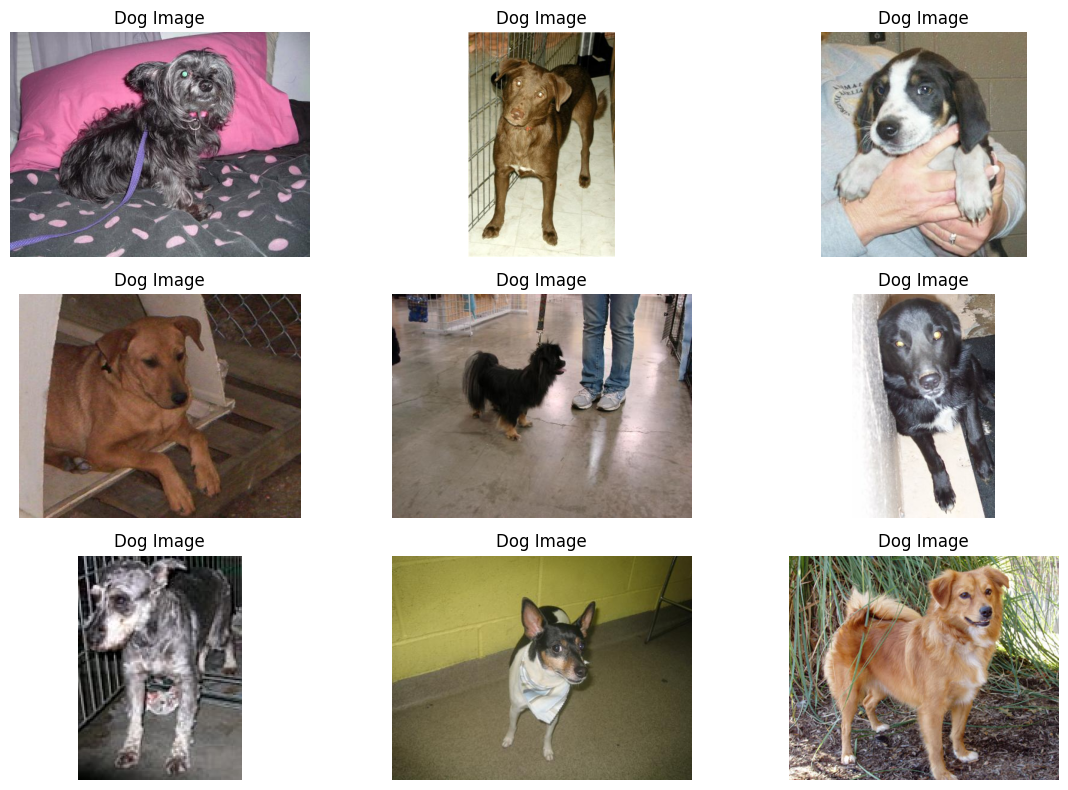

In [36]:
# Comprobar las 9 primeras imágenes de perros

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(data_dir_dog)

# Cargar las nueve primeras imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(data_dir_dog, dog_image_files[i])
    img = image.load_img(img_path)  # Ajuste target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalice los valores de los píxeles a [0, 1].
    dog_images.append(img_array)

# Cree una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

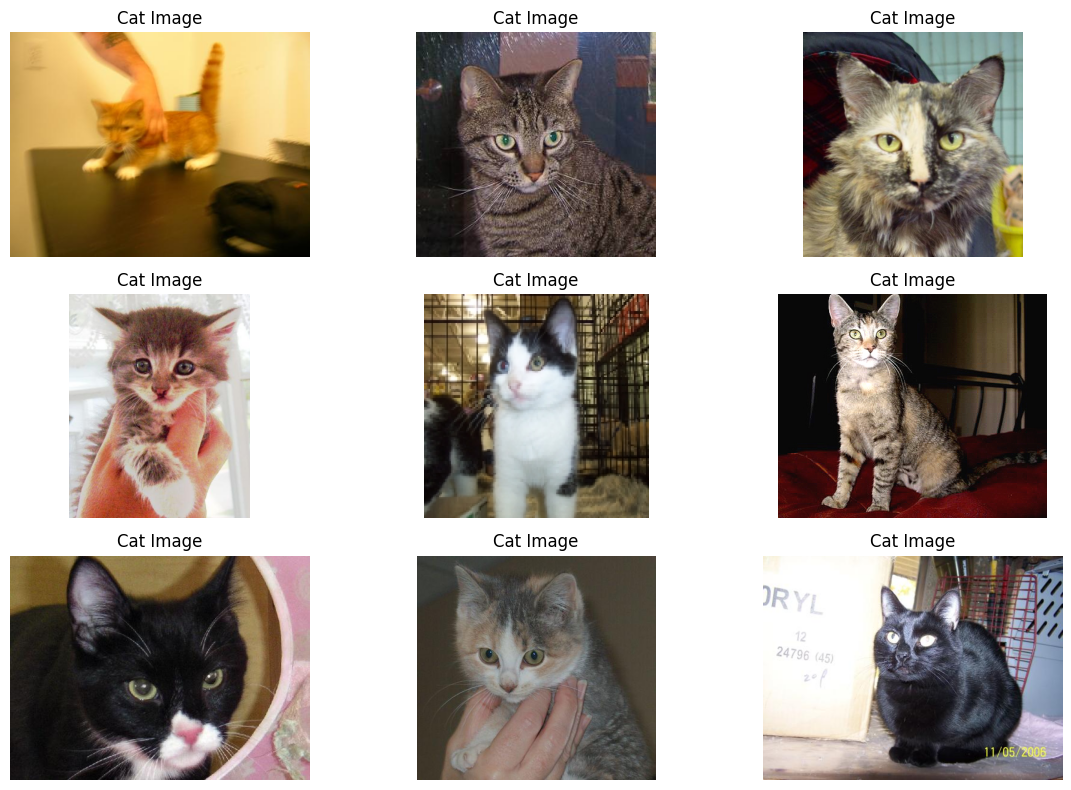

In [37]:
# Importar y comprobar las 9 primeras imágenes de gatos         

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(data_dir_cat)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(data_dir_cat, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes cat
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()